# Project Aim


This project aims to find the most accurate method of predicting rental bike sharing's demand using the Bike Sharing Dataset from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset).

# Business Case

Rental services are paid, so as a rental service company, one of your concerns is customer satisfaction. Predicting bike rental demand helps adjust supply, especially if it can be done a few days in advance. The big problem with early prediction is that it converges to the task of predicting weather, a task which is notoriously difficult. That aside, making sure customers have a bike available when they need it ensures they are satisfied with the service and will therefore avoid any bad reviews and maintain reputation.

# Tools and Technologies used

The programming language used in this project is Python . The following libraries were used for data analysis and data visualization.

Pandas : For loading the dataset and performing data wrangling

Matplotlib: For data visualization.

Seaborn: For data visualization.

NumPy: For some math operations in predictions.

Statsmodels: For statistical computations

# Dataset Information

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

* instant: record index<br>
* dteday : date<br>
* season : season (1:springer, 2:summer, 3:fall, 4:winter)<br>
* yr : year (0: 2011, 1:2012)<br>
* mnth : month ( 1 to 12)<br>
* hr : hour (0 to 23)<br>
* holiday : weather day is holiday or not<br>
* weekday : day of the week (Sun-0 to Sat-6)<br>
* workingday : if day is neither weekend nor holiday is 1, otherwise is 0.<br>
* weathersit :<br>
    * 1: Clear, Few clouds, Partly cloudy, Partly cloudy<br>
    * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
    * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
    * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>
* temp : Normalized temperature in Celsius. The values are divided to 41 (max)<br>
* atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)<br>
* hum: Normalized humidity. The values are divided to 100 (max)<br>
* windspeed: Normalized wind speed. The values are divided to 67 (max)<br>
* casual: count of casual users<br>
* registered: count of registered users<br>
* cnt: count of total rental bikes including both casual and registered<br>

## Importing Important libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999

pandas - used to perform data manipulation and analysis

numpy - used to perform a wide variety of mathematical operations on arrays

matplotlib - used for data visualization and graphical plotting

seaborn - built on top of matplotlib with similar functionalities

%matplotlib - to enable the inline plotting.

warnings - to manipulate warnings details

filterwarnings('ignore') is to ignore the warnings thrown by the modules (gives clean results)

max-columns is to display all the features.

## Loding dataset

In [8]:
df = pd.read_csv('D:\\Bike_Share_Prediction\\notebook\\data\\hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### inspecting the dataframe

In [9]:
#summary for the numeric columns 
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [10]:
# Check the number of rows and columns in the dataframe
df.shape

(17379, 17)

### Initial Observations from data:-
The maximum number of bikes rented was 977

On Average, people are renting 189 bikes throught the duration mentioned.

There are no null values present in the dataset.

In [11]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
# check for null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
# Converting date to Pandas datetime format
df['dteday'] = pd.to_datetime(df['dteday'])

In [14]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## 2. Data Cleaning and Analysis

In [15]:
# We will change the following Int column into a categorical column.
cols = ['season','yr','mnth','hr','holiday','weekday','workingday','weathersit']

for col in cols:
    df[col] = df[col].astype('category')
df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  category      
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [16]:
#The column 'instant' is very insignificant. Hence dropping that column.
df=df.drop('instant',axis=1)
df.shape

(17379, 16)

In [17]:
#dropping dteday
df=df.drop('dteday', axis=1)
df.shape

(17379, 15)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   yr          17379 non-null  category
 2   mnth        17379 non-null  category
 3   hr          17379 non-null  category
 4   holiday     17379 non-null  category
 5   weekday     17379 non-null  category
 6   workingday  17379 non-null  category
 7   weathersit  17379 non-null  category
 8   temp        17379 non-null  float64 
 9   atemp       17379 non-null  float64 
 10  hum         17379 non-null  float64 
 11  windspeed   17379 non-null  float64 
 12  casual      17379 non-null  int64   
 13  registered  17379 non-null  int64   
 14  cnt         17379 non-null  int64   
dtypes: category(8), float64(4), int64(3)
memory usage: 1.1 MB


Let us see how 'count' = number of bikes rented varies across the various categorical data (weathersit, season, workingday,yr,mnth,hr,holiday,weekday)

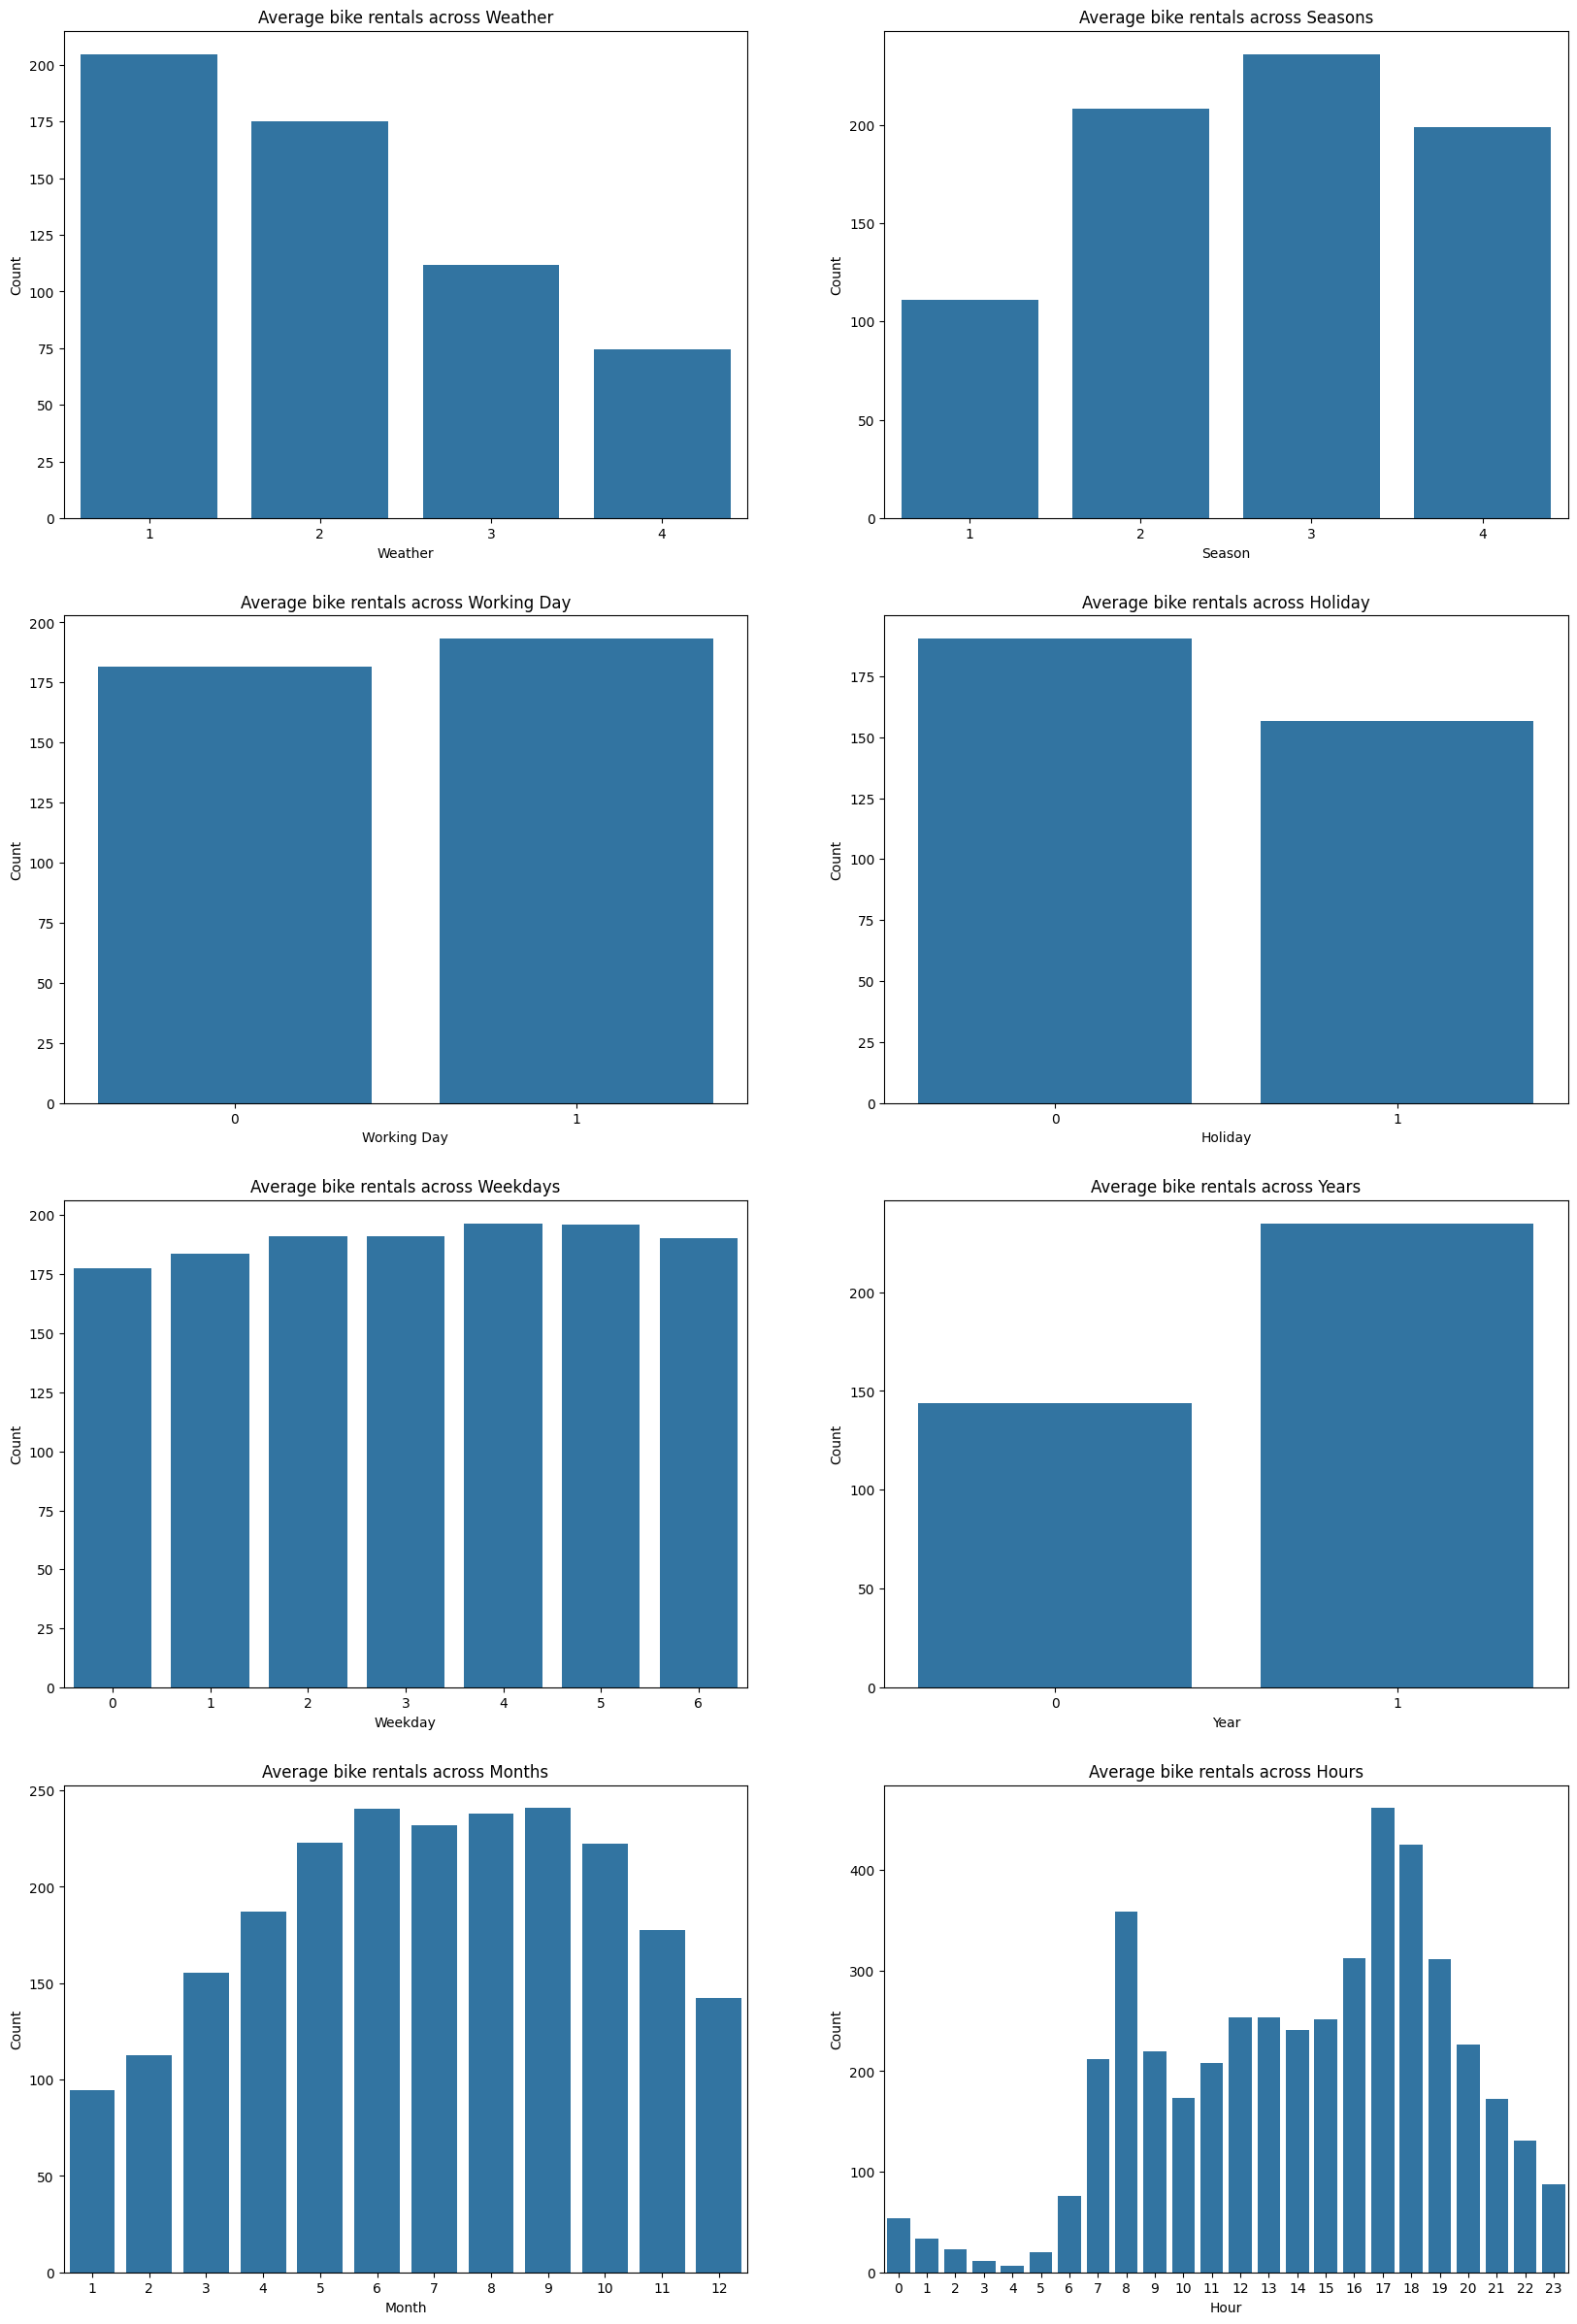

In [19]:
# Average values across each of the categorical columns 
fig = plt.figure(figsize=(20, 30))
axes = fig.add_subplot(4, 2, 1)
group_weather = pd.DataFrame(df.groupby(['weathersit'])['cnt'].mean()).reset_index()
sns.barplot(data=group_weather, x='weathersit', y='cnt', ax=axes)
axes.set(xlabel='Weather', ylabel='Count', title='Average bike rentals across Weather')

axes = fig.add_subplot(4, 2, 2)
group_season = pd.DataFrame(df.groupby(['season'])['cnt'].mean()).reset_index()
sns.barplot(data=group_season, x='season', y='cnt', ax=axes)
axes.set(xlabel='Season', ylabel='Count', title='Average bike rentals across Seasons')

axes = fig.add_subplot(4, 2, 3)
group_workingday = pd.DataFrame(df.groupby(['workingday'])['cnt'].mean()).reset_index()
sns.barplot(data=group_workingday, x='workingday', y='cnt', ax=axes)
axes.set(xlabel='Working Day', ylabel='Count', title='Average bike rentals across Working Day')

axes = fig.add_subplot(4, 2, 4)
group_season = pd.DataFrame(df.groupby(['holiday'])['cnt'].mean()).reset_index()
sns.barplot(data=group_season, x='holiday', y='cnt', ax=axes)
axes.set(xlabel='Holiday', ylabel='Count', title='Average bike rentals across Holiday')

axes = fig.add_subplot(4, 2, 5)
group_season = pd.DataFrame(df.groupby(['weekday'])['cnt'].mean()).reset_index()
sns.barplot(data=group_season, x='weekday', y='cnt', ax=axes)
axes.set(xlabel='Weekday', ylabel='Count', title='Average bike rentals across Weekdays')

axes = fig.add_subplot(4, 2, 6)
group_season = pd.DataFrame(df.groupby(['yr'])['cnt'].mean()).reset_index()
sns.barplot(data=group_season, x='yr', y='cnt', ax=axes)
axes.set(xlabel='Year', ylabel='Count', title='Average bike rentals across Years')

axes = fig.add_subplot(4, 2, 7)
group_season = pd.DataFrame(df.groupby(['mnth'])['cnt'].mean()).reset_index()
sns.barplot(data=group_season, x='mnth', y='cnt', ax=axes)
axes.set(xlabel='Month', ylabel='Count', title='Average bike rentals across Months')

axes = fig.add_subplot(4, 2, 8)
group_season = pd.DataFrame(df.groupby(['hr'])['cnt'].mean()).reset_index()
sns.barplot(data=group_season, x='hr', y='cnt', ax=axes)
axes.set(xlabel='Hour', ylabel='Count', title='Average bike rentals across Hours')


plt.show()

### Univariate Analysis

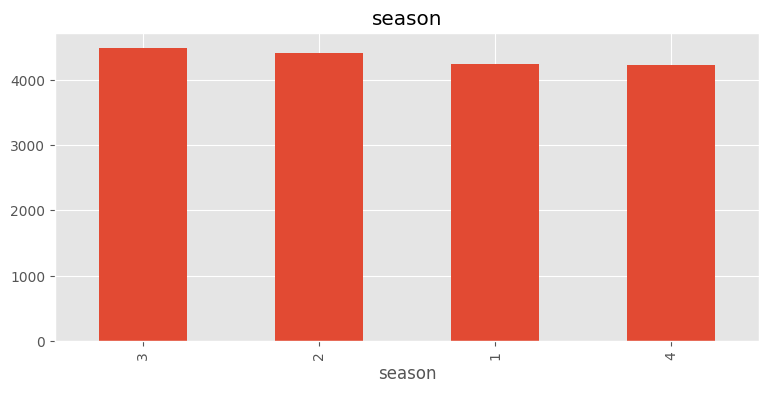

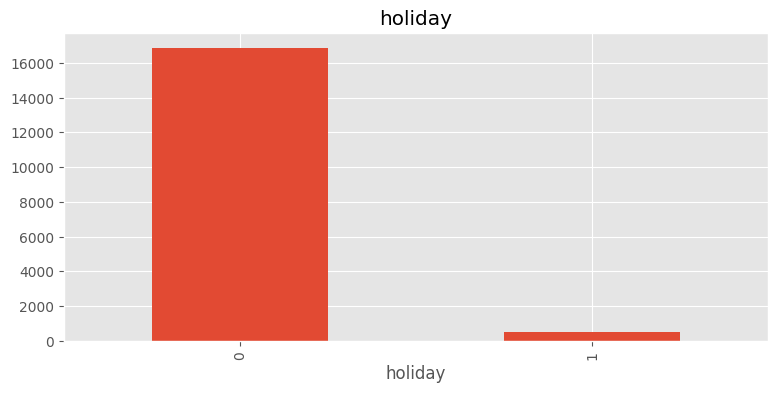

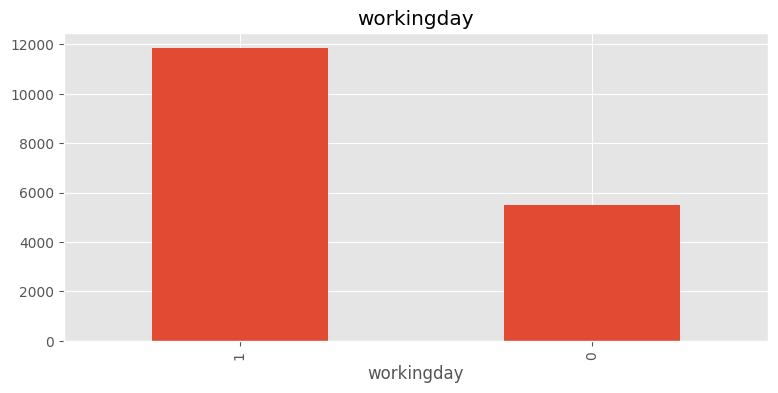

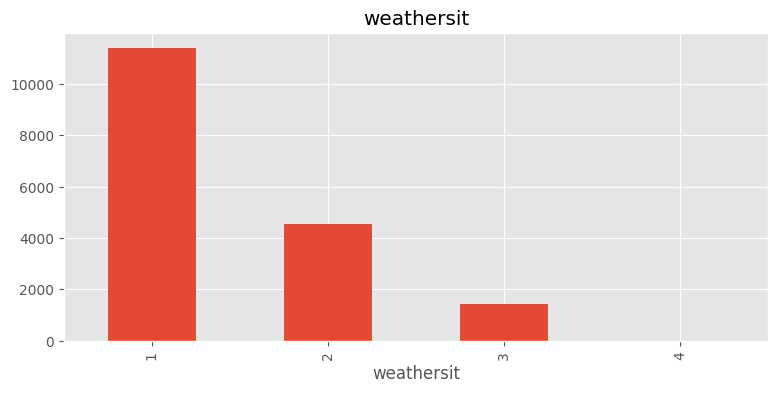

In [20]:
# Univariate analysis of few seemingly significant categorical variables:
univariate_categorical_cols=['season','holiday','workingday','weathersit']
plt.style.use('ggplot')
for column in univariate_categorical_cols:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    df[column].value_counts().plot(kind='bar')
    plt.title(column)

In [24]:
print('Number of holidays in 2011: ',len(df[(df['holiday']==1) & (df['yr']==0)]))
print('Number of holidays in 2012: ',len(df[(df['holiday']==1) & (df['yr']==1)]))

Number of holidays in 2011:  239
Number of holidays in 2012:  261


Inferences:

1. Even though the margin is minimum, the number of days in fall is maximum and winter is minimum. Number of days as per season in decreasing order: Fall, Summer, Spring, Winter.

2. The number of public holidays is 500 in 2 years. Number of holidays in 2011 and 2012 are 239 and 261 respectively

3. The number of non-working days(Public holidays+weekends) is slightly less than half the number of working days which can be favourable for bike renting for exploring different places during non working days but can be non-favourable as well since the daily commute to office during the working days can be hampered.

4. Weather situation is mostly Clear Day case scenario and Mist+Cloudy compared to Light Snow/Rain and Heavy Snow/Rain.

In [26]:
# Univariate analysis of few seemingly significant continuous variables:
univariate_numerical_cols=df.select_dtypes(include=np.number)
univariate_numerical_cols=list(univariate_numerical_cols)
univariate_numerical_cols
univariate_continuous_var=[i for i in univariate_numerical_cols if i not in ['yr',
 'mnth',
 'day',
 'holiday',
 'weekday',
 'workingday']]
univariate_continuous_var

['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

### Histogram grid analysis
Assessing how our features are distributed to get an idea of each variable's meaning in the context of bike rentals and look for possible outliers. Here we can assess what type of distribution each feature has (uniform, normal, exponential, etc.) and what variability we are dealing with.

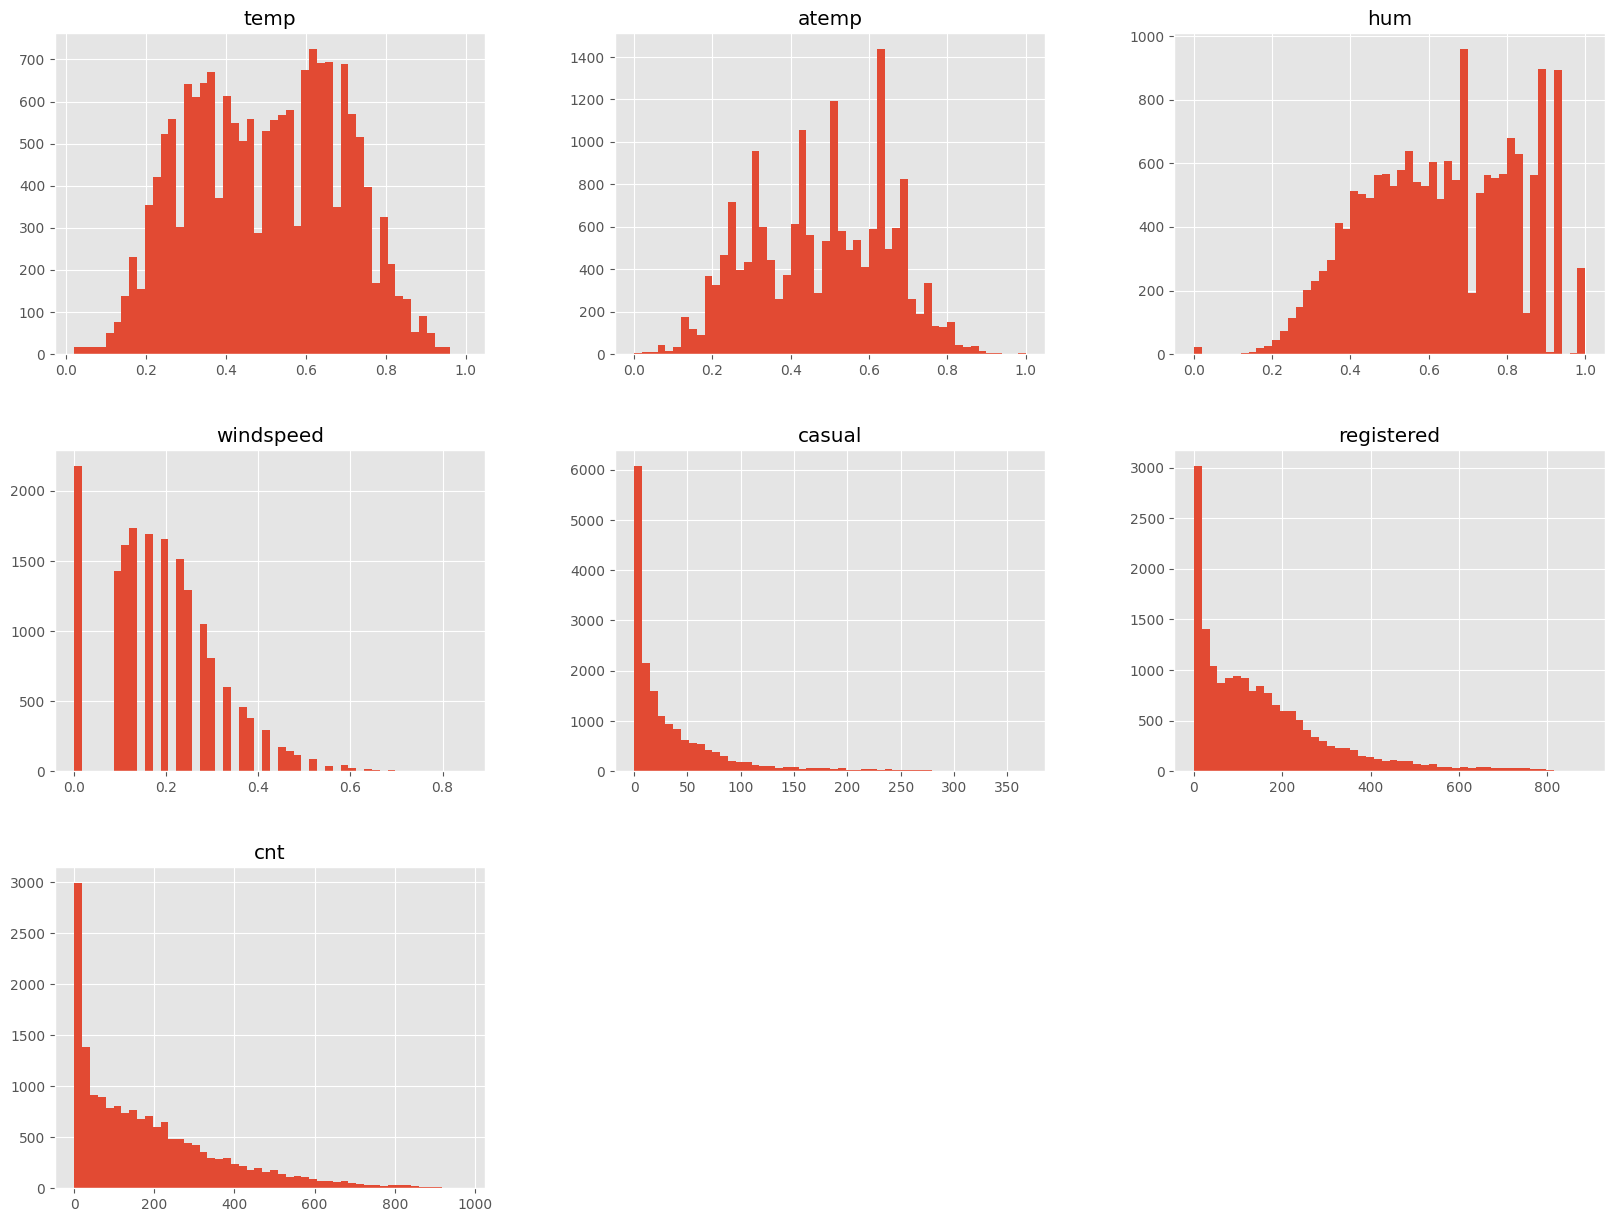

In [27]:
df.hist(bins=50,figsize=(20,15))
plt.show()

Inferences:

1. Values of temperature and feeling temperature (atemp) are differently distributed.

2. Humidity is almost randomly distributed.

3. The KDE of windspeed is not a normal distribution but has a right skew distribution.

4. The spread of casual users is not normally distributed, instead is right skewed also, that of registered users is right skew distribution ultimately leading to cnt to be right skewed.

#### Bivariate Analysis

[Text(0.5, 1.0, 'Count of bikes during different months')]

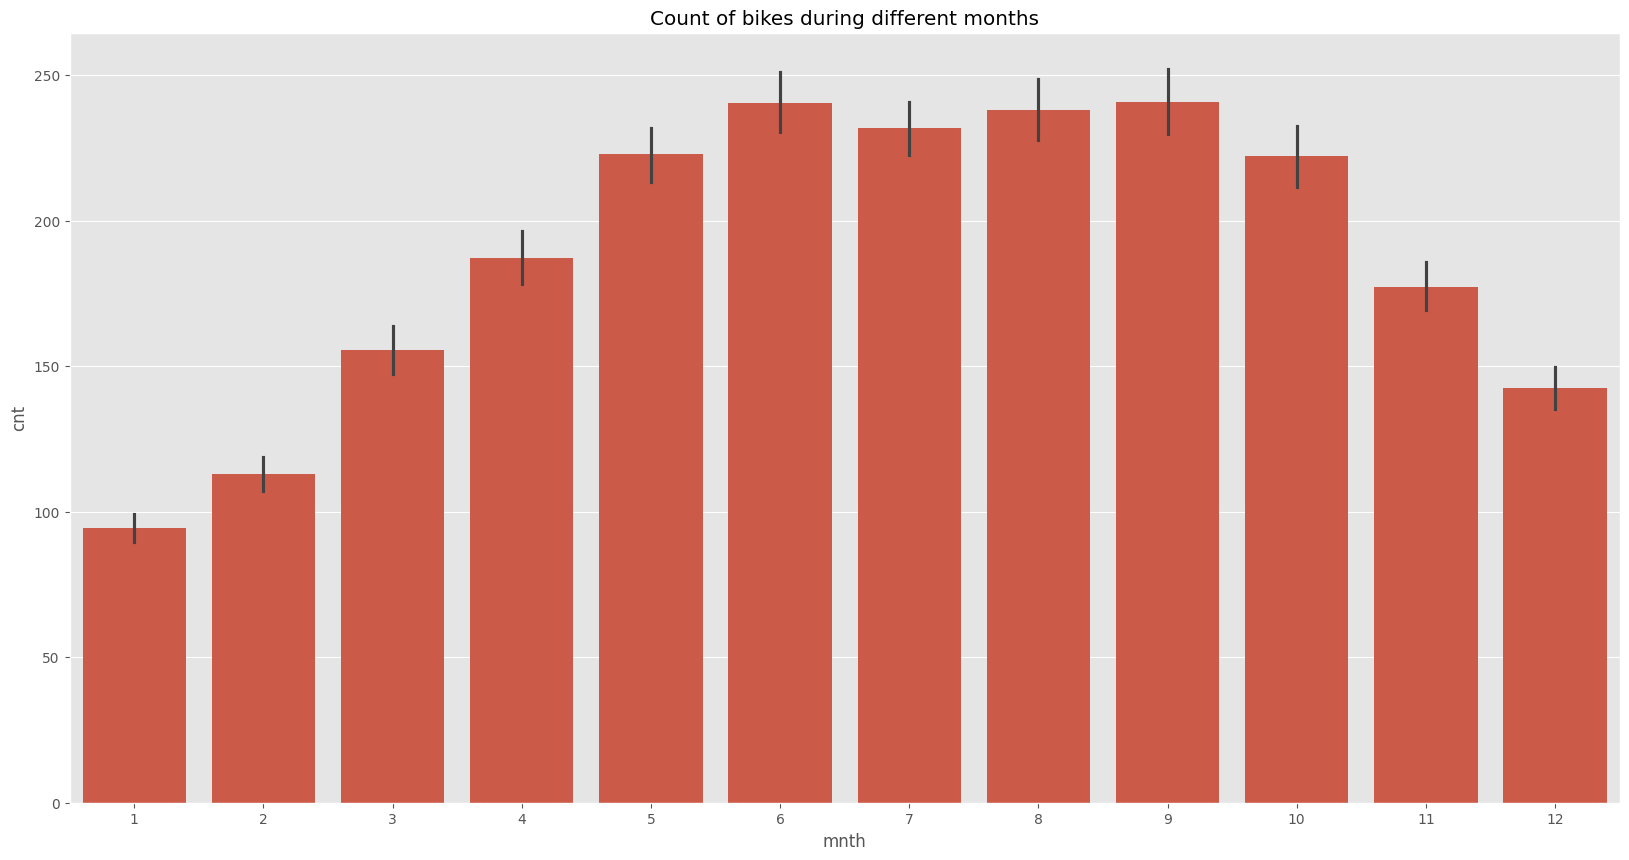

In [32]:
# Let us explore the graph in terms of months.
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='mnth', y='cnt', ax=ax)
ax.set(title='Count of bikes during different months')

Over a period of time, the number of users increases and gradually, the number of users decreases.

[Text(0.5, 1.0, 'Count of bikes during different days')]

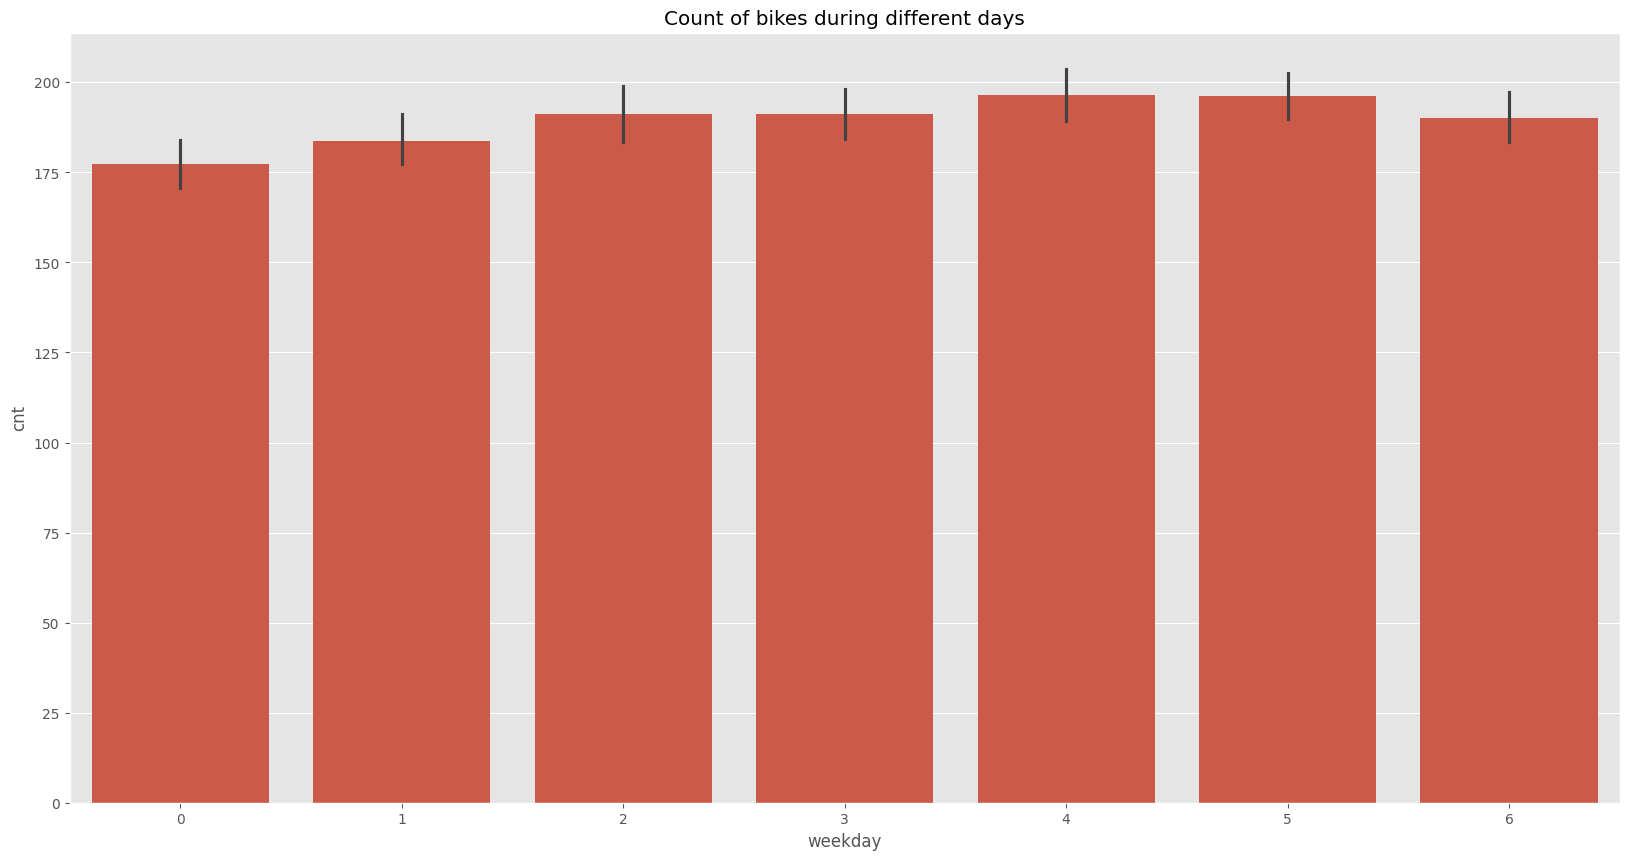

In [35]:
# Let us explore the graph in terms of weekdays.
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='weekday', y='cnt', ax=ax)
ax.set(title='Count of bikes during different days')

In this graph, we observe an average number of users throughout the week.

Thus, the average distribution is impractical for predictions

[Text(0.5, 1.0, 'Relation between humidity and users')]

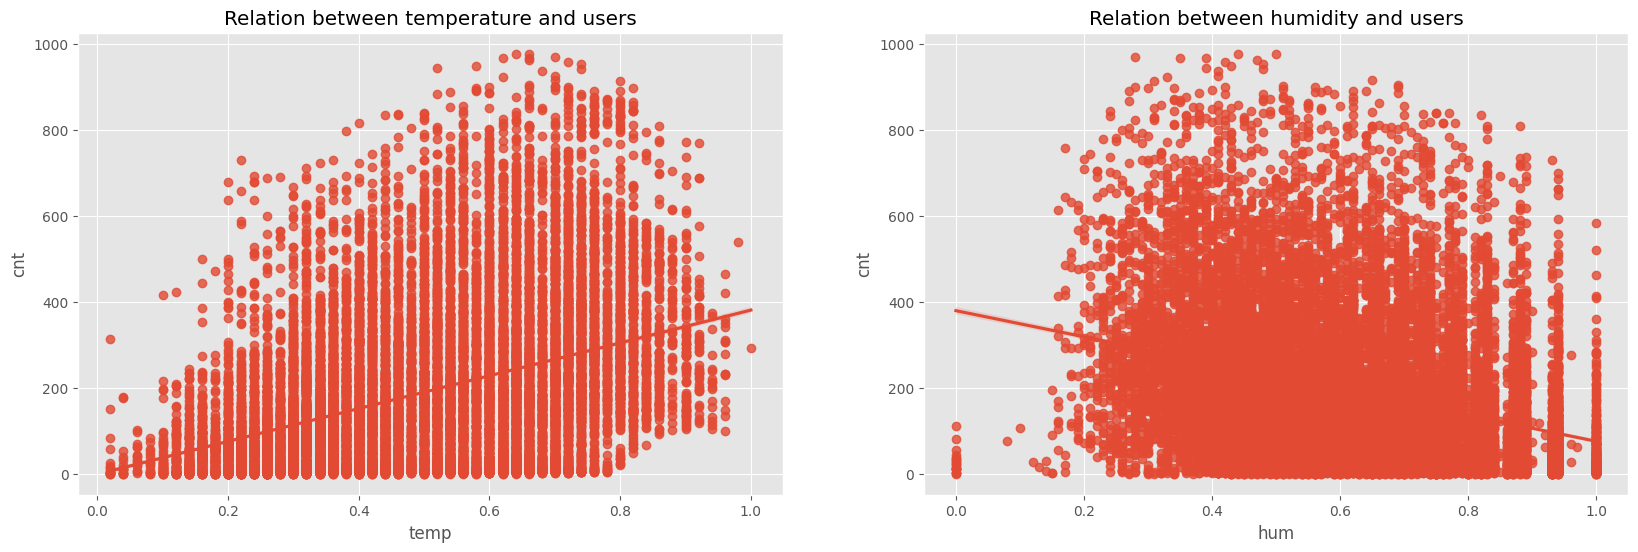

In [36]:
# Regression plot of temperature and humidity with respect to count.
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.regplot(x=df['temp'], y=df['cnt'], ax=ax1)
ax1.set(title="Relation between temperature and users")
sns.regplot(x=df['hum'], y=df['cnt'], ax=ax2)
ax2.set(title="Relation between humidity and users")

[Text(0.5, 1.0, 'Relation between windspeed and users')]

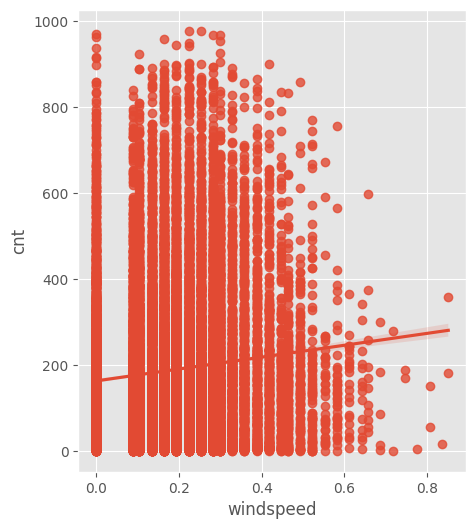

In [42]:
fig, (ax3) = plt.subplots(ncols=1, figsize=(5,6))
sns.regplot(x=df['windspeed'], y=df['cnt'], ax=ax3)
ax1.set(title="Relation between windspeed and users")

With the increase in temperature, the number of user increases.

When the humidity increases the number of users decreases.

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   yr          17379 non-null  category
 2   mnth        17379 non-null  category
 3   hr          17379 non-null  category
 4   holiday     17379 non-null  category
 5   weekday     17379 non-null  category
 6   workingday  17379 non-null  category
 7   weathersit  17379 non-null  category
 8   temp        17379 non-null  float64 
 9   atemp       17379 non-null  float64 
 10  hum         17379 non-null  float64 
 11  windspeed   17379 non-null  float64 
 12  casual      17379 non-null  int64   
 13  registered  17379 non-null  int64   
 14  cnt         17379 non-null  int64   
dtypes: category(8), float64(4), int64(3)
memory usage: 1.1 MB


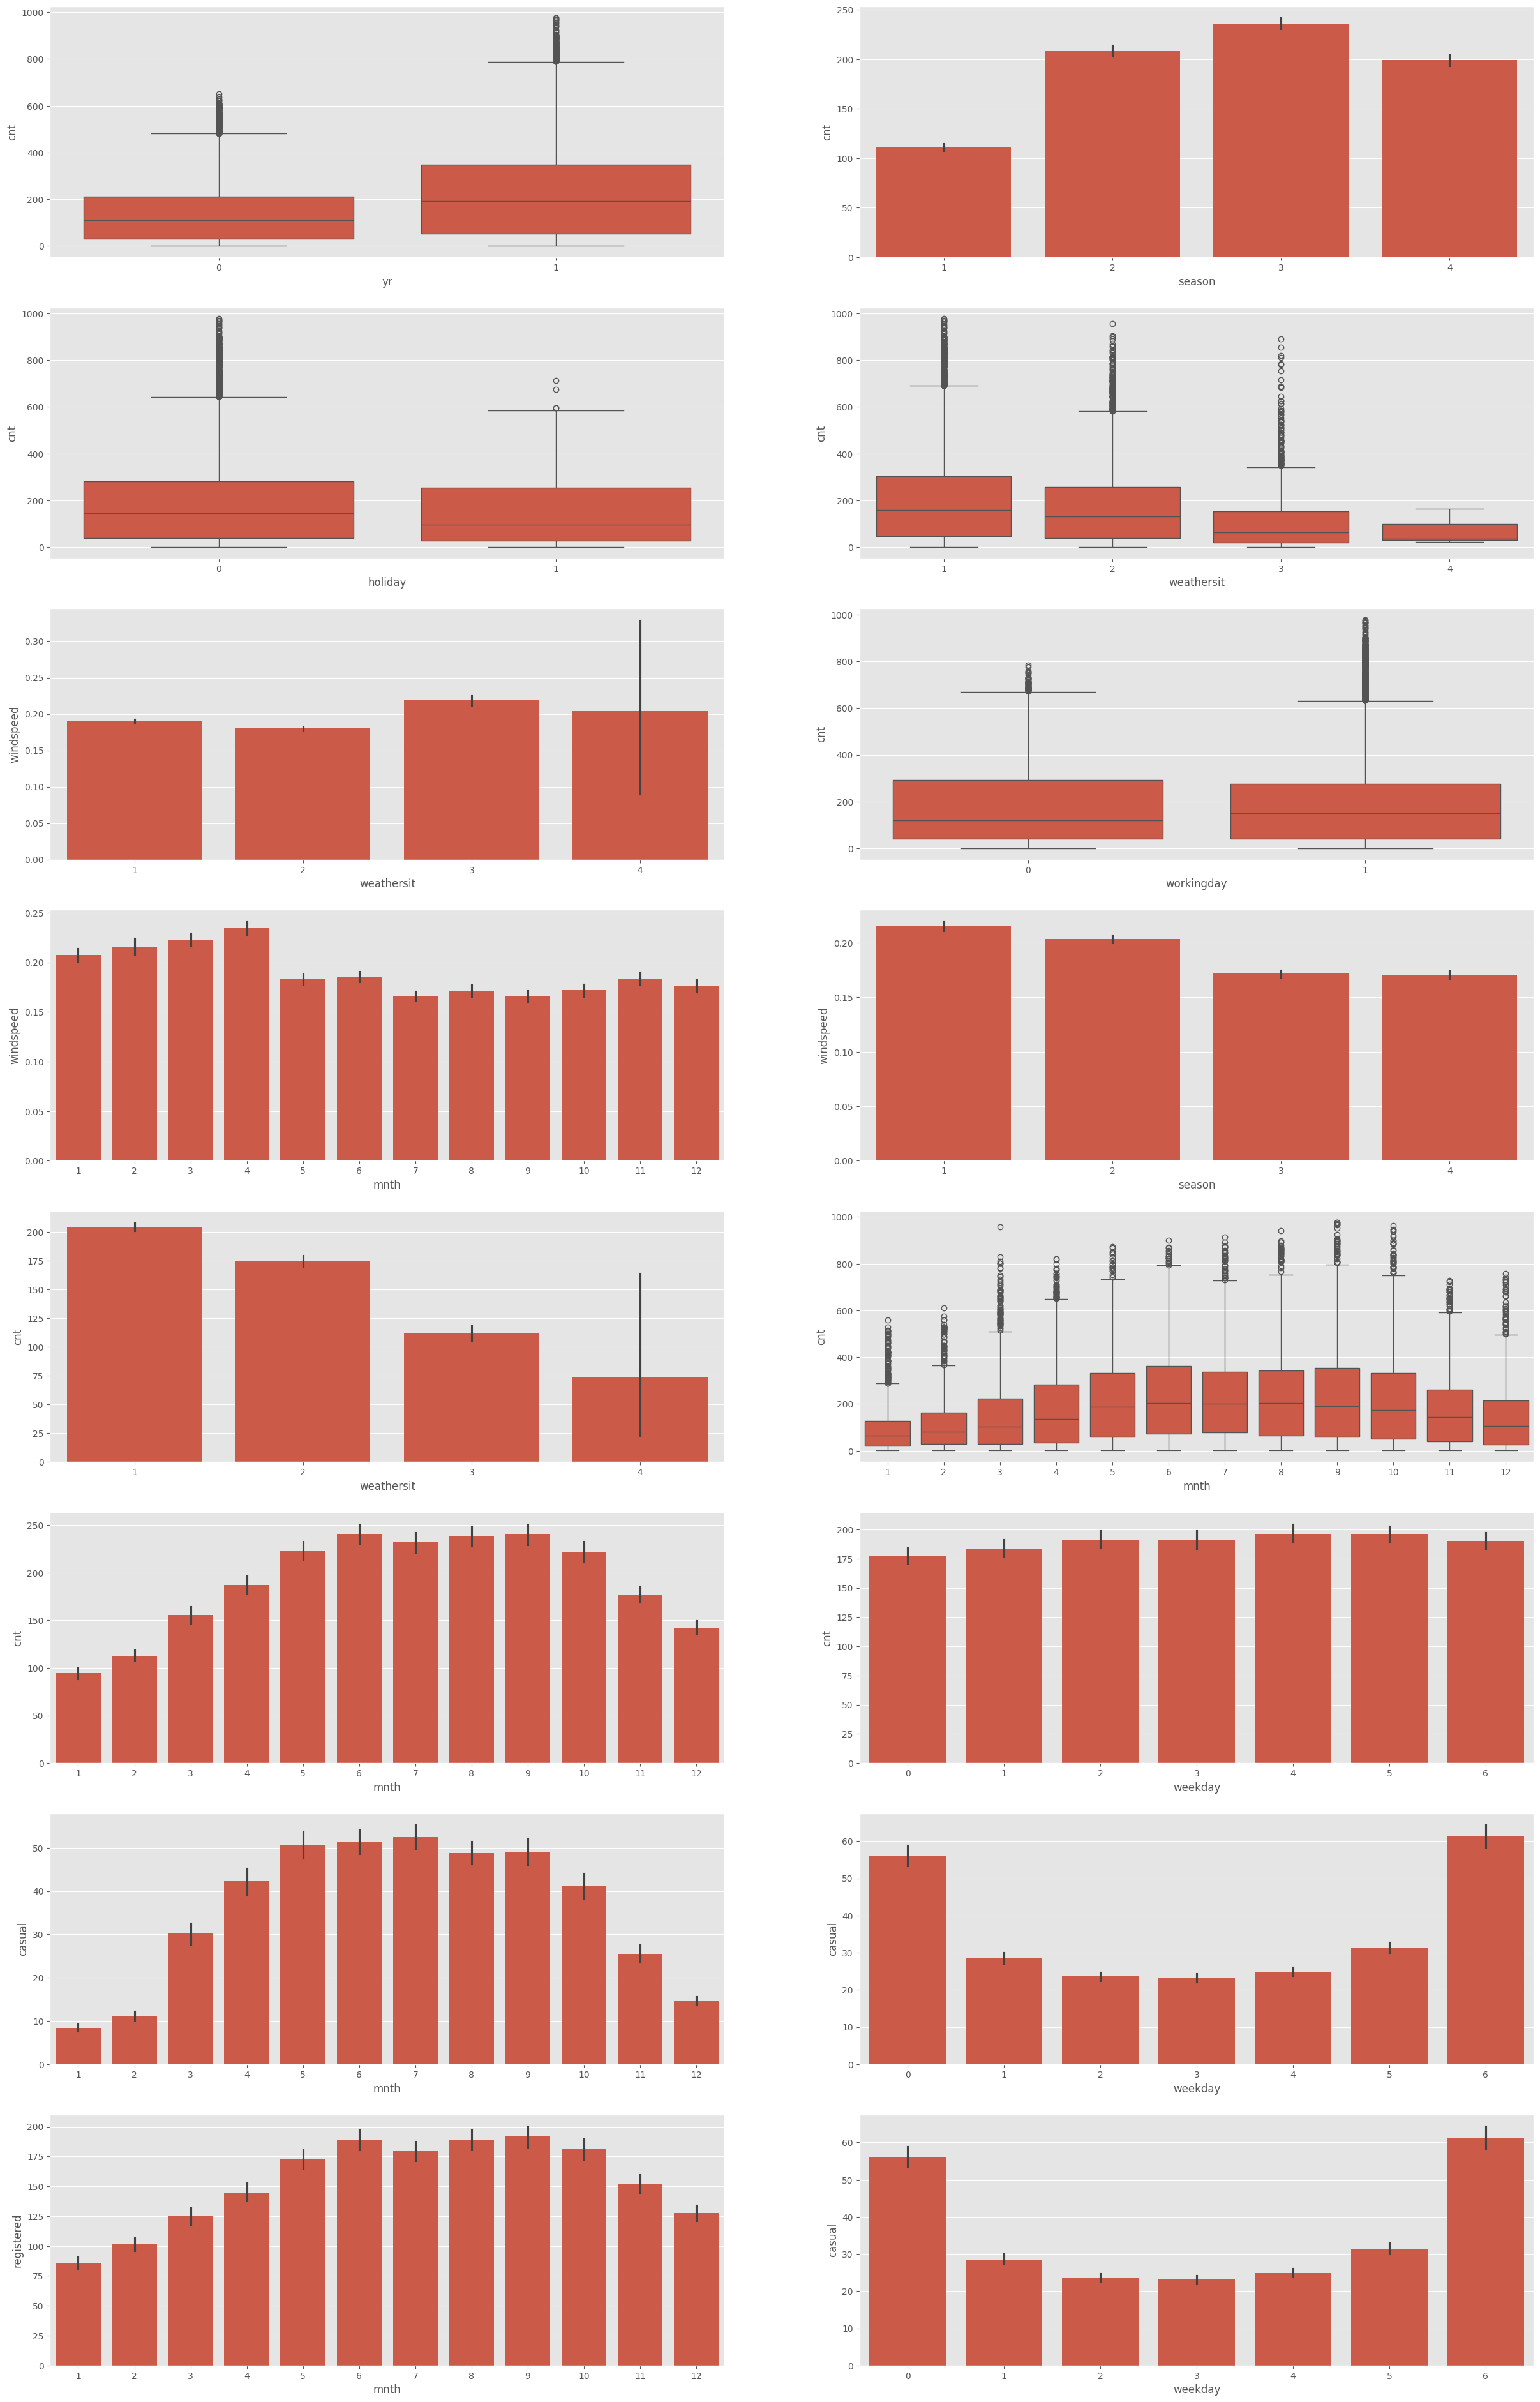

In [53]:
#Bivariate analysis of categorical variables with cnt
plt.figure(figsize=(30,48))
plt.subplot(8,2,1)
sns.boxplot(x='yr', y='cnt', data=df)

plt.subplot(8,2,2)
sns.barplot(x='season', y='cnt', data=df)

plt.subplot(8,2,3)
sns.boxplot(x='holiday', y='cnt', data=df)

plt.subplot(8,2,4)
sns.boxplot(x='weathersit', y='cnt', data=df)

plt.subplot(8,2,5)
sns.barplot(x='weathersit', y='windspeed', data=df)

plt.subplot(8,2,6)
sns.boxplot(x='workingday', y='cnt', data=df)

plt.subplot(8,2,7)
sns.barplot(x='mnth', y='windspeed', data=df)

plt.subplot(8,2,8)
sns.barplot(x='season', y='windspeed', data=df)

plt.subplot(8,2,9)
sns.barplot(x='weathersit', y='cnt', data=df)

plt.subplot(8,2,10)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)

plt.subplot(8,2,11)
sns.barplot(x='mnth', y='cnt', data=df)

plt.subplot(8,2,12)
sns.barplot(x='weekday', y='cnt', data=df)

plt.subplot(8,2,13)
sns.barplot(x='mnth', y='casual', data=df)

plt.subplot(8,2,14)
sns.barplot(x='weekday', y='casual', data=df)

plt.subplot(8,2,15)
sns.barplot(x='mnth', y='registered', data=df)

plt.subplot(8,2,16)
sns.barplot(x='weekday', y='casual', data=df)

plt.show()


Inferences

1. The cnt in the year 2012 was way more than that in 2011.

2. Number of bikes booked according to seasons in a decreasing order: Fall, Summer, Winter and Spring.

3. The trend of increasing use of bike starts from january(lowest) till June then stays almost the same till september and then starts dropping. There's a scope to increase the bike usage in the months from january till May and from October to december. The drop of bike usage from october till December might be explained by the winter season and less bike usage from January to April might be explained by higher windspeed.

4. Days of the week doesn't matter much. Almost similar number of bikes are rented same number of times everyday in a week.

5. The average count of bikes rented when the weather is situation is 'Clear' or 'Mist + Cloudy' is much more compared to other situations - Wind speed during the bad weather situations (light snow/rain and heavy snow/rain) is more than 'Clear' and 'Mist + Cloudy' weather situations and hence more number of bikes are rented in such situations.

6. There was a drop of bike rents by casual users in the winters and in the first 2 months of spring and less drop in the registered users. These people may be regular office going people or fitness enthusiasts.

Also, by looking at a sample of the dataset it seems like column casual + registered = count

Now we'll test wether casual + registered equals count or not.

In [58]:
test_count = df['casual'] + df['registered'] == df['cnt']
assert test_count.sum() == len(test_count)

there is no assertion error. Hence proved that casual + registered = cnt

Since we have casual+registered=cnt and inferences are built from casual and registered records, let's drop them since these columns seem irrelevant for the model. Also it is a given that increasing casual or registered users both will be profitable factor for the business.

In [59]:
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [60]:
df_new=df.copy()

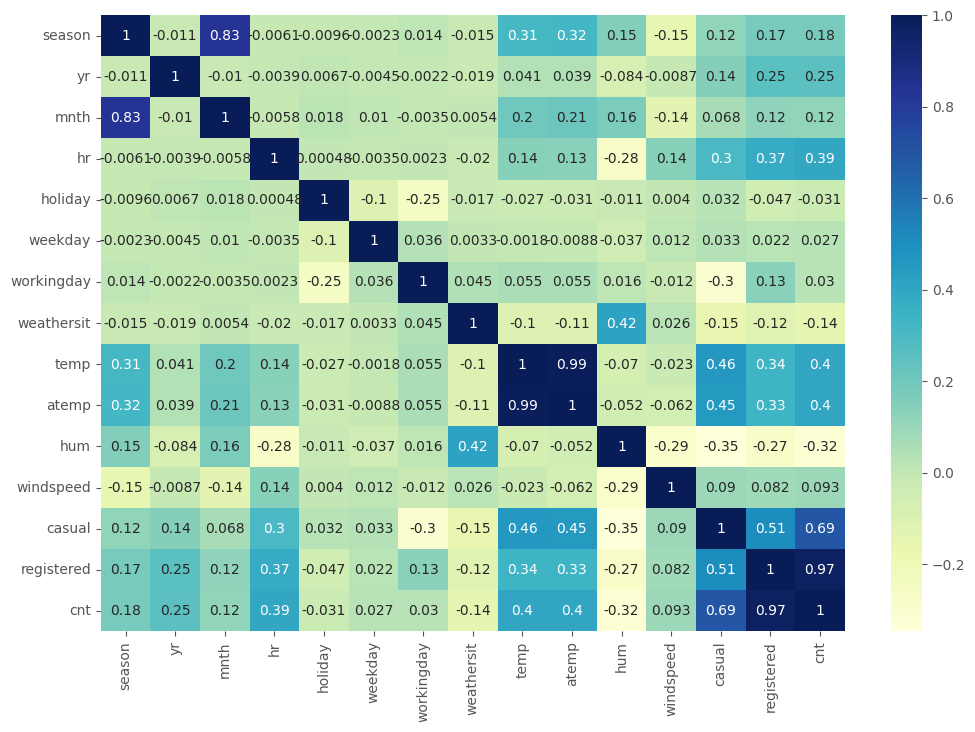

In [81]:
#Checking the colinearlity amongst the variables
plt.figure(figsize=(12,8))
sns.heatmap(df_new.corr(),annot=True,cmap="YlGnBu")
plt.show()

Since we have casual+registered=cnt and inferences are built from casual and registered records, let's drop them from original dataframe df since these columns seem irrelevant for the model. Also it is a given that increasing casual or registered users both will be profitable factor for the business.

In [82]:
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [83]:
df=df.drop(['casual', 'registered'],axis=1)
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


Also temp and atemp are very highly corelated and their respective colinearities with cnt are also same. Hence dropping atemp since feeling temperature can be relatively less accurate compared to temperature.

In [84]:
df=df.drop('atemp',axis=1)

In [85]:
# Dropping holiday column as it is highly correlated to'workingday' column.
df=df.drop('holiday',axis=1)
df.head()

,season,yr,mnth,hr,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,1,0.24,0.81,0.0,16
1,1,0,1,1,6,0,1,0.22,0.80,0.0,40
2,1,0,1,2,6,0,1,0.22,0.80,0.0,32
3,1,0,1,3,6,0,1,0.24,0.75,0.0,13
4,1,0,1,4,6,0,1,0.24,0.75,0.0,1


In [87]:
# Initiating Train test split 
from sklearn.model_selection import train_test_split

In [88]:
train_set,test_set=train_test_split(df,test_size=0.2,random_state=42)

In [89]:
#data transformation

In [102]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numerical_columns = ["temp", "hum","windspeed"]
categorical_columns = ["yr","mnth","hr","weekday","season","workingday","weathersit"]
num_pipeline= Pipeline(steps=[("scaler",StandardScaler())])
cat_pipeline=Pipeline(steps=[
            ("one_hot_encoder",OneHotEncoder(handle_unknown = 'error',drop='first',sparse=False)),
            ("scaler",StandardScaler(with_mean=False))
            ])


preprocessor=ColumnTransformer(
            [
            ("num_pipeline",num_pipeline,numerical_columns),
            ("cat_pipelines",cat_pipeline,categorical_columns)

            ],remainder="passthrough"
        )

In [109]:
target_column_name="cnt"

input_feature_train_df=train_set.drop(columns=[target_column_name],axis=1)
target_feature_train_df=train_set[target_column_name]  

input_feature_test_df=test_set.drop(columns=[target_column_name],axis=1)
target_feature_test_df=test_set[target_column_name]

In [110]:
# Applying preprocessing object on training dataframe and testing dataframe

In [111]:
input_feature_train_arr=preprocessor.fit_transform(input_feature_train_df)
input_feature_test_arr=preprocessor.transform(input_feature_test_df)

In [118]:
train_arr = np.c_[input_feature_train_arr, np.array(target_feature_train_df)]
test_arr = np.c_[input_feature_test_arr, np.array(target_feature_test_df)]

In [119]:
def save_object(file_path, obj):
    dir_path = os.path.dirname(file_path)

    os.makedirs(dir_path, exist_ok=True)

    with open(file_path, "wb") as file_obj:
        pickle.dump(obj, file_obj)

In [120]:
import os
import pickle
class DataTransformationConfig():
    preprocessor_obj_file_path=os.path.join('artifacts',"preprocessor.pkl")

In [121]:
save_object(

    file_path=DataTransformationConfig().preprocessor_obj_file_path,
    obj=preprocessor

)

In [122]:
trained_model_file_path=os.path.join("artifacts","model.pkl")

In [123]:
# Split training and test input data

In [124]:
X_train,y_train,X_test,y_test=(
    train_arr[:,:-1],
    train_arr[:,-1],
    test_arr[:,:-1],
    test_arr[:,-1]
)

In [125]:
# Create an Evaluate Function to give all metrics after model Training

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted) 
    return mae, rmse, r2_square

In [127]:
from catboost import CatBoostRegressor
from sklearn.ensemble import (AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor



models = {
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Linear Regression": LinearRegression(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "KNeighbor Regressor": KNeighborsRegressor(),
    "Support Vector Regressor":SVR(),
    "Bagging Regressor": BaggingRegressor()
}

In [128]:
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Root Mean Squared Error: 19.8115
- Mean Absolute Error: 12.3578
- R2 Score: 0.9882
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 51.5304
- Mean Absolute Error: 32.1271
- R2 Score: 0.9161


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.5989
- Mean Absolute Error: 0.0150
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 74.4178
- Mean Absolute Error: 43.5831
- R2 Score: 0.8251


Gradient Boosting
Model performance for Training set
- Root Mean Squared Error: 80.4676
- Mean Absolute Error: 58.1210
- R2 Score: 0.8050
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 79.4903
- Mean Absolute Error: 57.4594
- R2 Score: 0.8005


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 101.9672
- Mean Absolute Error: 75.5563
- R2 Score: 0.686

### Results

In [129]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
4,CatBoosting Regressor,0.932126
0,Random Forest,0.916143
8,Bagging Regressor,0.904335
1,Decision Tree,0.825109
2,Gradient Boosting,0.800454
6,KNeighbor Regressor,0.779298
3,Linear Regression,0.681019
7,Support Vector Regressor,0.439633
5,AdaBoost Regressor,0.369074


In [130]:
# So, the best performing model is CatBoostRegressor.
# Let us train it separately again from start and see its details

#### CatBoostRegressor

In [131]:
catboost_model = CatBoostRegressor()
catboost_model = catboost_model.fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

Learning rate set to 0.062057
0:	learn: 176.7783364	total: 5.09ms	remaining: 5.08s
1:	learn: 171.8075275	total: 11ms	remaining: 5.47s
2:	learn: 167.2922321	total: 20.2ms	remaining: 6.7s
3:	learn: 163.0056082	total: 25.4ms	remaining: 6.32s
4:	learn: 159.1996580	total: 31.1ms	remaining: 6.18s
5:	learn: 155.8950367	total: 36.7ms	remaining: 6.08s
6:	learn: 152.7808595	total: 42.6ms	remaining: 6.05s
7:	learn: 149.4752871	total: 48.7ms	remaining: 6.03s
8:	learn: 146.8370363	total: 54.9ms	remaining: 6.04s
9:	learn: 144.3337492	total: 59ms	remaining: 5.84s
10:	learn: 141.5000408	total: 64.2ms	remaining: 5.77s
11:	learn: 139.1534037	total: 68.5ms	remaining: 5.64s
12:	learn: 137.0756272	total: 72.7ms	remaining: 5.52s
13:	learn: 135.0812394	total: 77ms	remaining: 5.42s
14:	learn: 133.4009515	total: 82.6ms	remaining: 5.42s
15:	learn: 131.2332938	total: 86.5ms	remaining: 5.32s
16:	learn: 129.2821430	total: 90.4ms	remaining: 5.22s
17:	learn: 127.4213047	total: 94.2ms	remaining: 5.14s
18:	learn: 125.

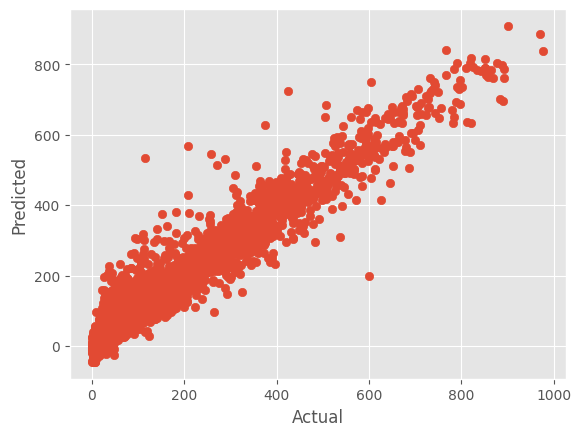

In [132]:
# Plot y_pred and y_test
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [133]:
# Difference between Actual and Predicted Values
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
0,425.0,427.279465,-2.279465
1,88.0,73.920374,14.079626
2,4.0,17.347291,-13.347291
3,526.0,515.904780,10.095220
4,13.0,40.133270,-27.133270
...,...,...,...
3471,17.0,18.078750,-1.078750
3472,85.0,40.418521,44.581479
3473,98.0,84.155197,13.844803
3474,266.0,328.198063,-62.198063


In [134]:
save_object(
    trained_model_file_path,
    catboost_model 
)


#### Hyperparameter Tuning for all models

In [138]:
# Gridseach is done on the training set, during training it should not see the test set bcoz we don't want to tune our
# hyperparameters based on the test set

#### Hyperparameter Tuning for Cat Boosting Regression model

In [139]:
CBR_parameters={
        "iterations": [1000],
        "learning_rate": [1e-3, 0.1],
        "depth": [1, 10],
        "subsample": [0.05, 1.0],
        "colsample_bylevel": [0.05, 1.0],
        "min_data_in_leaf": [1, 100]    
    
}

In [140]:
from sklearn.model_selection import GridSearchCV

cbr_tuning_model=GridSearchCV(estimator=CatBoostRegressor(),
                                   param_grid=CBR_parameters,cv=3,n_jobs=-1)

In [141]:
from datetime import datetime
cbr_tuning_model.fit(X_train,y_train)

0:	learn: 171.4607426	total: 16.3ms	remaining: 16.3s
1:	learn: 161.9172146	total: 31.3ms	remaining: 15.6s
2:	learn: 153.5296594	total: 46.2ms	remaining: 15.3s
3:	learn: 145.7077898	total: 61.9ms	remaining: 15.4s
4:	learn: 138.6796337	total: 76.6ms	remaining: 15.2s
5:	learn: 132.8079981	total: 93.2ms	remaining: 15.4s
6:	learn: 127.2522306	total: 109ms	remaining: 15.5s
7:	learn: 121.7237487	total: 126ms	remaining: 15.6s
8:	learn: 117.6682670	total: 143ms	remaining: 15.8s
9:	learn: 113.8403467	total: 160ms	remaining: 15.8s
10:	learn: 109.9445088	total: 176ms	remaining: 15.9s
11:	learn: 106.3853895	total: 193ms	remaining: 15.9s
12:	learn: 102.7033306	total: 211ms	remaining: 16s
13:	learn: 100.0586044	total: 228ms	remaining: 16.1s
14:	learn: 97.1064829	total: 246ms	remaining: 16.2s
15:	learn: 94.5811548	total: 265ms	remaining: 16.3s
16:	learn: 92.5296628	total: 284ms	remaining: 16.4s
17:	learn: 90.4924206	total: 306ms	remaining: 16.7s
18:	learn: 88.4529054	total: 325ms	remaining: 16.8s
19:	

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x000002EF0FF70070>,
             n_jobs=-1,
             param_grid={'colsample_bylevel': [0.05, 1.0], 'depth': [1, 10],
                         'iterations': [1000], 'learning_rate': [0.001, 0.1],
                         'min_data_in_leaf': [1, 100],
                         'subsample': [0.05, 1.0]})

In [143]:
# Check accuracy
print (f'Train Accuracy - : {cbr_tuning_model.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {cbr_tuning_model.score(X_test,y_test):.3f}')

Train Accuracy - : 0.988
Test Accuracy - : 0.944


In [144]:
# best hyperparameters for catboost regressor
cbr_tuning_model.best_params_

{'colsample_bylevel': 1.0,
 'depth': 10,
 'iterations': 1000,
 'learning_rate': 0.1,
 'min_data_in_leaf': 1,
 'subsample': 1.0}

In [145]:
# training catboost model with best hyperparameters
tuned_cbr_hyper_model= CatBoostRegressor(colsample_bylevel=1.0,
                                         depth=10,
                                         iterations=1000,
                                         learning_rate=0.1,
                                         min_data_in_leaf=1,
                                         subsample=1.0
                                
)

In [146]:
# fitting model
tuned_cbr_hyper_model.fit(X_train,y_train)

0:	learn: 171.4607426	total: 15.7ms	remaining: 15.7s
1:	learn: 161.9172146	total: 33.7ms	remaining: 16.8s
2:	learn: 153.5296594	total: 53.5ms	remaining: 17.8s
3:	learn: 145.7077898	total: 69.6ms	remaining: 17.3s
4:	learn: 138.6796337	total: 85.5ms	remaining: 17s
5:	learn: 132.8079981	total: 101ms	remaining: 16.7s
6:	learn: 127.2522306	total: 123ms	remaining: 17.5s
7:	learn: 121.7237487	total: 145ms	remaining: 18s
8:	learn: 117.6682670	total: 166ms	remaining: 18.3s
9:	learn: 113.8403467	total: 191ms	remaining: 18.9s
10:	learn: 109.9445088	total: 216ms	remaining: 19.4s
11:	learn: 106.3853895	total: 245ms	remaining: 20.2s
12:	learn: 102.7033306	total: 266ms	remaining: 20.2s
13:	learn: 100.0586044	total: 287ms	remaining: 20.2s
14:	learn: 97.1064829	total: 310ms	remaining: 20.3s
15:	learn: 94.5811548	total: 333ms	remaining: 20.5s
16:	learn: 92.5296628	total: 357ms	remaining: 20.7s
17:	learn: 90.4924206	total: 383ms	remaining: 20.9s
18:	learn: 88.4529054	total: 406ms	remaining: 21s
19:	learn

In [147]:
# Check accuracy
print (f'Train Accuracy - : {tuned_cbr_hyper_model.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {tuned_cbr_hyper_model.score(X_test,y_test):.3f}')

Train Accuracy - : 0.988
Test Accuracy - : 0.944


In [148]:
# prediction 

tuned_cbr_pred=tuned_cbr_hyper_model.predict(X_test)

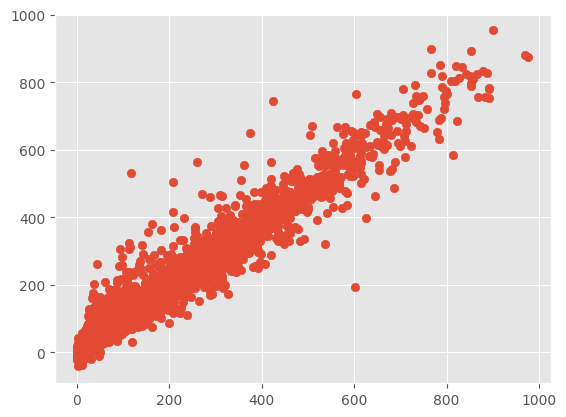

In [149]:
plt.scatter(y_test,tuned_cbr_pred)

In [150]:
# Let us compare now Error rate of our model with hyper tuning of paramerters to our original model which is 
# without the tuning of parameters.

In [151]:
# With hyperparameter tuned 

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_cbr_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_cbr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_cbr_pred)))

MAE: 26.86409951098349
MSE: 1788.167274967652
RMSE: 42.28672693609251


In [152]:
# Catboost regressor model (before hyperparameter tuning) is at 4th position in models.values() 
list(models.values())[4]

In [153]:
# without hyperparameter tuning 
cbr_prediction=list(models.values())[4].predict(X_test)
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,cbr_prediction))
print('MSE:', metrics.mean_squared_error(y_test, cbr_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, cbr_prediction)))

MAE: 30.29550950931159
MSE: 2149.264506521926
RMSE: 46.36016076893959


In [154]:
# Difference between Actual and Predicted Values with Hyperparameter tuning
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':tuned_cbr_pred,'Difference':y_test-tuned_cbr_pred})
pred_df

,Actual Value,Predicted Value,Difference
0,425.0,395.710051,29.289949
1,88.0,90.620582,-2.620582
2,4.0,12.302707,-8.302707
3,526.0,516.357435,9.642565
4,13.0,14.096443,-1.096443
...,...,...,...
3471,17.0,18.974234,-1.974234
3472,85.0,83.613447,1.386553
3473,98.0,74.182476,23.817524
3474,266.0,303.229539,-37.229539


In [155]:
# SO we can see hyperparameter tuning here has reduced the error rate in CatBoost model 
# and accuracy has increased from 93.36 to 94.5 percent

#### Hyperparameter Tuning for Bagging Regressor model

In [156]:
BR_parameters = {'base_estimator': [None, LinearRegression(), KNeighborsRegressor()],
          'n_estimators': [20,50,100],
          'max_samples': [0.5,1.0],
          'max_features': [0.5,1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

Above we intialized hyperparmeters random range using Gridsearch to find the best parameters for our Bagging regressor model.

In [158]:
from sklearn.model_selection import GridSearchCV

br_tuning_model=GridSearchCV(BaggingRegressor(),
                                   param_grid=BR_parameters,cv=3,verbose=1,n_jobs=-1)

In [159]:
from datetime import datetime
br_tuning_model.fit(X_train,y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=3, estimator=BaggingRegressor(), n_jobs=-1,
             param_grid={'base_estimator': [None, LinearRegression(),
                                            KNeighborsRegressor()],
                         'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [0.5, 1.0], 'max_samples': [0.5, 1.0],
                         'n_estimators': [20, 50, 100]},
             verbose=1)

In [160]:
# best hyperparameters for bagging regressor
br_tuning_model.best_params_

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 100}

In [161]:
# training bagging regressor model with best hyperparameters
tuned_br_hyper_model= BaggingRegressor(
    base_estimator= None,
    bootstrap= True,
    bootstrap_features= False,
    max_features=1.0,
    max_samples=1.0,
    n_estimators=100
)

In [162]:
# fitting model
tuned_br_hyper_model.fit(X_train,y_train)

BaggingRegressor(base_estimator=None, n_estimators=100)

In [163]:
#Check accuracy
print (f'Train Accuracy - : {tuned_br_hyper_model.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {tuned_br_hyper_model.score(X_test,y_test):.3f}')

Train Accuracy - : 0.988
Test Accuracy - : 0.915


In [164]:
# prediction 

tuned_br_pred=tuned_br_hyper_model.predict(X_test)

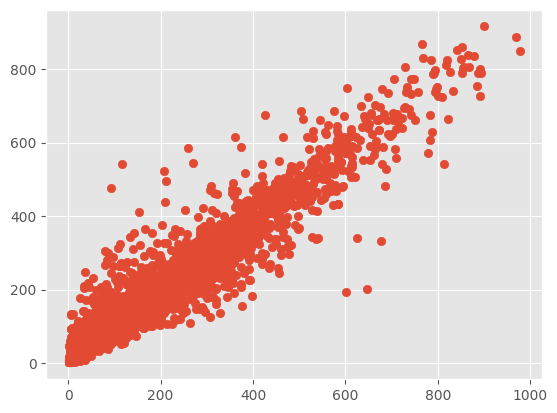

In [165]:
plt.scatter(y_test,tuned_br_pred)

In [166]:
# Let us compare now Error rate of our model with hyper tuning of paramerters to our original model which is 
# without the tuning of parameters.

In [167]:
# With hyperparameter tuned 

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_br_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_br_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_br_pred)))

MAE: 32.08180562633569
MSE: 2679.8623674101505
RMSE: 51.767387102404065


In [168]:
#Bagging regressor (before hyperparameter tuning) is at 8th position in models.values() 
list(models.values())[8]

BaggingRegressor()

In [169]:
# without hyperparameter tuning 
br_prediction=list(models.values())[8].predict(X_test)
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,br_prediction))
print('MSE:', metrics.mean_squared_error(y_test, br_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, br_prediction)))

MAE: 34.3791690640583
MSE: 3029.280557453491
RMSE: 55.038900401929276


In [170]:
# SO we can see hyperparameter tuning here has reduced the error rate in Bagging Regressor Model 
# and accuracy has increased from 90.51 percent to 91.6

#### Hyperparameter Tuning for Decison Tree

In [171]:
DTR_parameters={'criterion':['squared_error', 'friedman_mse', 'absolute_error'],
                'splitter':['best','random'],
                'max_depth':[3,5,7,10,15,20,30,50],
                'min_samples_leaf':[3,5,10,15,20,23,25],
                'min_samples_split':[8,10,12,18,20],
                'max_leaf_nodes':[None,10,20,30,40,50,60]                 
               }

In [172]:
# Above we intialized hyperparmeters random range using Gridsearch to find the best parameters for our decision tree model.

In [173]:
from sklearn.model_selection import GridSearchCV

dtr_tuning_model=GridSearchCV(DecisionTreeRegressor(),
                                   param_grid=DTR_parameters,scoring='neg_mean_squared_error',cv=3,verbose=2,n_jobs=4)

In [174]:
from datetime import datetime
dtr_tuning_model.fit(X_train,y_train)

Fitting 3 folds for each of 11760 candidates, totalling 35280 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=4,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [3, 5, 7, 10, 15, 20, 30, 50],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60],
                         'min_samples_leaf': [3, 5, 10, 15, 20, 23, 25],
                         'min_samples_split': [8, 10, 12, 18, 20],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=2)

In [175]:
# best hyperparameters for decision tree regressor
dtr_tuning_model.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 50,
 'max_leaf_nodes': None,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'splitter': 'random'}

In [176]:
# training decision tree with best hyperparameters
tuned_dtr_hyper_model= DecisionTreeRegressor(
                                         max_depth=50,
                                         max_leaf_nodes=None,
                                         min_samples_leaf=5,
                                         min_samples_split=10,   
                                         splitter='random',
                                         criterion='friedman_mse')

In [177]:
# fitting model
tuned_dtr_hyper_model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=50,
                      min_samples_leaf=5, min_samples_split=10,
                      splitter='random')

In [178]:
#Check accuracy
print (f'Train Accuracy - : {tuned_dtr_hyper_model.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {tuned_dtr_hyper_model.score(X_test,y_test):.3f}')

Train Accuracy - : 0.926
Test Accuracy - : 0.866


In [179]:
# prediction 

tuned_dtr_pred=tuned_dtr_hyper_model.predict(X_test)

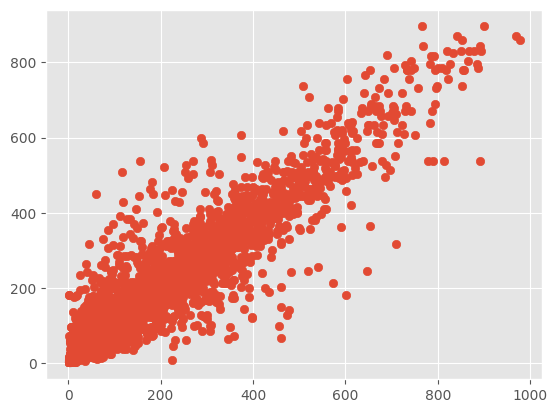

In [180]:
plt.scatter(y_test,tuned_dtr_pred)

In [181]:
# Let us compare now Error rate of our model with hyper tuning of paramerters to our original model which is 
# without the tuning of parameters.

In [182]:
# With hyperparameter tuned  

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_dtr_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_dtr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_dtr_pred)))

MAE: 40.05671815478346
MSE: 4246.134062066699
RMSE: 65.16236691577969


In [183]:
# Decision tree regressor (before hyperparameter tuning) is at 1st position in models.values() 
list(models.values())[1]


DecisionTreeRegressor()

In [184]:
# without hyperparameter tuning 
dtr_prediction=list(models.values())[1].predict(X_test)
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,dtr_prediction))
print('MSE:', metrics.mean_squared_error(y_test, dtr_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_prediction)))

MAE: 43.5831415420023
MSE: 5538.010069044879
RMSE: 74.41780747270695


In [185]:
# SO we can see hyperparameter tuning here has reduced the error rate in Decision Tree model 
# and accuracy has increased from 83.59 to 86.6 percent

#### Hyperparameter Tuning for Random Forest Regression Model

In [186]:
RF_parameters={'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
               'max_features':['sqrt','log2',None],
               'n_estimators': [8,16,32,64,128,256]
    }

In [187]:
from sklearn.model_selection import GridSearchCV
rf_tuning_model=GridSearchCV(RandomForestRegressor(),
                                   param_grid=RF_parameters,cv=3,verbose=2,n_jobs=-1)

In [188]:
rf_tuning_model.fit(X_train,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [8, 16, 32, 64, 128, 256]},
             verbose=2)

In [189]:
# Check Accuracy
print (f'Train Accuracy - : {rf_tuning_model.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_tuning_model.score(X_test,y_test):.3f}')

Train Accuracy - : 0.989
Test Accuracy - : 0.916


In [190]:
# best hyperparameters for random forest regressor
rf_tuning_model.best_params_

{'criterion': 'friedman_mse', 'max_features': None, 'n_estimators': 256}

In [191]:
# training random forest with best hyperparameters
tuned_rf_hyper_model= RandomForestRegressor(
                                         max_features=None,
                                         criterion='friedman_mse',
                                         n_estimators=256)

# fitting model
tuned_rf_hyper_model.fit(X_train,y_train)

RandomForestRegressor(criterion='friedman_mse', max_features=None,
                      n_estimators=256)

In [192]:
# Check Accuracy
print (f'Train Accuracy - : {tuned_rf_hyper_model.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {tuned_rf_hyper_model.score(X_test,y_test):.3f}')

Train Accuracy - : 0.989
Test Accuracy - : 0.916


In [193]:
# prediction 

tuned_rf_pred=tuned_rf_hyper_model.predict(X_test)

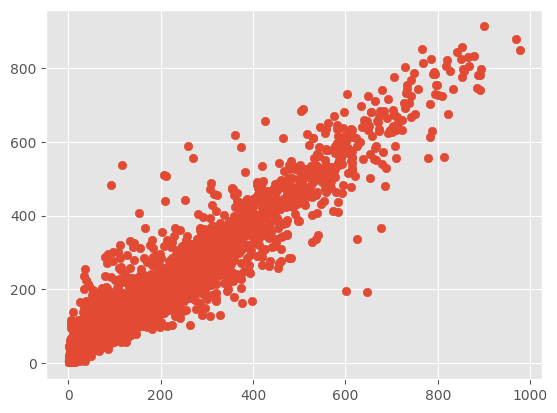

In [194]:
plt.scatter(y_test,tuned_rf_pred)

In [195]:
# Let us compare now Error rate of our model with hyper tuning of paramerters to our original model which is 
# without the tuning of parameters.

In [196]:
# With hyperparameter tuned 

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_rf_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_rf_pred)))

MAE: 32.16663359550523
MSE: 2661.4490194910927
RMSE: 51.58923356177229


In [197]:
# Random forest (before hyperparameter tuning) is at 0th  position in models.values() 
list(models.values())[0]

RandomForestRegressor()

In [198]:
# without hyperparameter tuning 
rf_prediction=list(models.values())[0].predict(X_test)
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,rf_prediction))
print('MSE:', metrics.mean_squared_error(y_test, rf_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_prediction)))

MAE: 32.127120588799386
MSE: 2655.379035704617
RMSE: 51.53037003267701


In [199]:
#Hyperparameter Tuning to Random Forest improved its accuracy slightly from 91.56 to 91.6

#### Hyperparameter Tuning for Gradient Boosting Regression Model

In [200]:
GBR_parameters = {'learning_rate': [0.2,0.02,0.02,1],
                  'max_depth'    : [2,4,6,8,10]
                 }

In [201]:
# GBR_parameters={
# #     'loss':['squared_error', 'huber', 'absolute_error', 'quantile'],
#     'learning_rate':[.1,.01,.05,.001],
#     'subsample':[0.6,0.7,0.75,0.8,0.85,0.9],
# #     'criterion':['squared_error', 'friedman_mse'],
# #     'max_features':['auto','sqrt','log2'],
#     'n_estimators': [8,16,32,64,128,256]
    
#     }

In [202]:
# GBR_parameters = {
#     'learning_rate': [0.01,0.02,0.03,0.04],
#     'subsample'    : [0.9, 0.5, 0.2, 0.1],
#     'n_estimators' : [100,500,1000, 1500],
#     'max_depth'    : [4,6,8,10]
#                  }

In [203]:
# GBR_parameters = { 'loss' : ['ls', 'lad', 'huber', 'quantile'],
#               'learning_rate' : (0.05,0.25,0.50,1),
#               'criterion' : ['friedman_mse', 'mse', 'mae'],
#               'max_features' : ['auto', 'sqrt', 'log2']
#              }

In [204]:
gbr_tuning_model=GridSearchCV(GradientBoostingRegressor(),
                             param_grid=GBR_parameters,)

In [205]:
gbr_tuning_model.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.2, 0.02, 0.02, 1],
                         'max_depth': [2, 4, 6, 8, 10]})

In [206]:
# Checking Accuracy
print(f' Train Accuracy - : {gbr_tuning_model.score(X_train,y_train):.3f}')
print(f' Test Accuracy - : {gbr_tuning_model.score(X_test,y_test):.3f}')

 Train Accuracy - : 0.981
 Test Accuracy - : 0.919


In [207]:
# best hyperparameters for Gradient Boosting model
gbr_tuning_model.best_params_

{'learning_rate': 0.2, 'max_depth': 8}

In [208]:
# training this model with best hyperparameters
tuned_gbr_hyper_model= GradientBoostingRegressor(
    learning_rate=0.2, 
    max_depth=8
)

# fitting model
tuned_gbr_hyper_model.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=8)

In [209]:
# Check Accuracy
print (f'Train Accuracy - : {tuned_gbr_hyper_model.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {tuned_gbr_hyper_model.score(X_test,y_test):.3f}')

Train Accuracy - : 0.981
Test Accuracy - : 0.919


In [210]:
# prediction 

tuned_gbr_pred=tuned_gbr_hyper_model.predict(X_test)

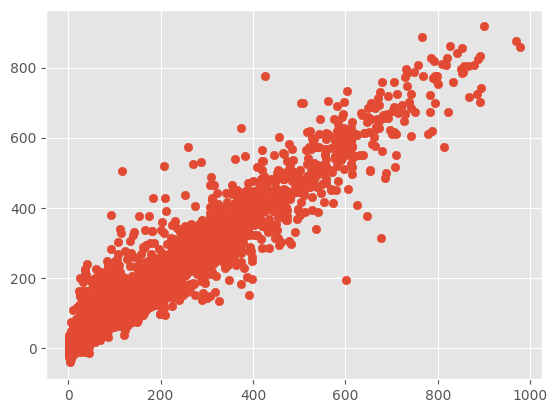

In [211]:
plt.scatter(y_test,tuned_gbr_pred)

In [212]:
# Let us compare now Error rate of our model with hyper tuning of paramerters to our original model which is 
# without the tuning of parameters.

In [213]:
# With hyperparameter tuned 

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_gbr_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_gbr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_gbr_pred)))

MAE: 32.098821466135504
MSE: 2549.068132333511
RMSE: 50.48829698389035


In [214]:
# Gradient Boosting Regressor (before hyperparameter tuning) is at 2nd  position in models.values() 
list(models.values())[2]

GradientBoostingRegressor()

In [215]:
# without hyperparameter tuning 
gbr_prediction=list(models.values())[2].predict(X_test)
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,gbr_prediction))
print('MSE:', metrics.mean_squared_error(y_test, gbr_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gbr_prediction)))

MAE: 57.4593538921216
MSE: 6318.704947773043
RMSE: 79.49028209644902


In [216]:
# Hyperparameter Tuning to Gradient Boosting Regressor model reduced its error rate significantly
# and improved its accuracy rate highly  from 80.05 to 92.1 percent

### Hyperparameter Tuning for KNeighbors Regressor model

In [217]:
KNR_parameters={'n_neighbors': [2,3,4,5,6], 
                'weights': ['uniform','distance']}

In [218]:
knr_tuning_model=GridSearchCV(KNeighborsRegressor(),
                             param_grid=KNR_parameters,scoring='r2',cv=3)

In [219]:
knr_tuning_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [220]:
# Checking Accuracy
print(f' Train Accuracy - : {knr_tuning_model.score(X_train,y_train):.3f}')
print(f' Test Accuracy - : {knr_tuning_model.score(X_test,y_test):.3f}')

 Train Accuracy - : 1.000
 Test Accuracy - : 0.806


In [221]:
# best hyperparameters for KNeighbors Regressor model
knr_tuning_model.best_params_

{'n_neighbors': 6, 'weights': 'distance'}

In [222]:
# training this model with best hyperparameters
tuned_knr_hyper_model= KNeighborsRegressor(
    n_neighbors=6,
    weights='distance'
)

# fitting model
tuned_knr_hyper_model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=6, weights='distance')

In [223]:
# Check Accuracy
print (f'Train Accuracy - : {tuned_knr_hyper_model.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {tuned_knr_hyper_model.score(X_test,y_test):.3f}')

Train Accuracy - : 1.000
Test Accuracy - : 0.806


In [224]:
# prediction 

tuned_knr_pred=tuned_knr_hyper_model.predict(X_test)

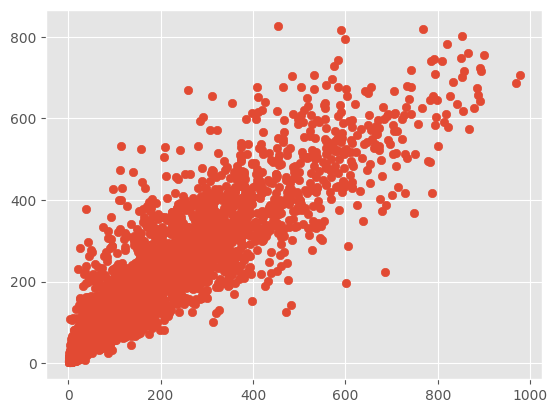

In [225]:
plt.scatter(y_test,tuned_knr_pred)

In [226]:
# Let us compare now Error rate of our model with hyper tuning of paramerters to our original model which is 
# without the tuning of parameters.

In [227]:
# With hyperparameter tuned 

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_knr_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_knr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_knr_pred)))

MAE: 51.13617056805795
MSE: 6129.791773308662
RMSE: 78.29298674407984


In [228]:
# Kneighbors model (before hyperparameter tuning) is at 2nd  position in models.values() 
list(models.values())[6]

KNeighborsRegressor()

In [229]:
# without hyperparameter tuning 
knr_prediction=list(models.values())[6].predict(X_test)
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,knr_prediction))
print('MSE:', metrics.mean_squared_error(y_test, knr_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knr_prediction)))

MAE: 55.760184119677795
MSE: 6988.604234752589
RMSE: 83.597872190341


In [230]:
# Hyperparameter Tuning to K Nearest Neighbors model reduced its error rate and
# improved its accuracy slightly from 77.70 to 80.7

#### Hyperparameter Tuning for Support Vector Regressor model

In [231]:
SVR_parameters={
    'C': [0.1,1,10,100],
    'gamma': [0.01,0.1,1,10],
    'kernel': ['linear']
}

In [232]:
svr_tuning_model=GridSearchCV(SVR(),
                             param_grid=SVR_parameters,cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

In [233]:
svr_tuning_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10],
                         'kernel': ['linear']},
             scoring='neg_mean_squared_error')

In [234]:
# Checking Accuracy
print(f' Train Accuracy - : {svr_tuning_model.score(X_train,y_train):.3f}')
print(f' Test Accuracy - : {svr_tuning_model.score(X_test,y_test):.3f}')

 Train Accuracy - : -11227.549
 Test Accuracy - : -11011.171


In [235]:
# best hyperparameters for Linear Regressor model
svr_tuning_model.best_params_


{'C': 100, 'gamma': 0.01, 'kernel': 'linear'}

In [236]:
# training this model with best hyperparameters
tuned_svr_hyper_model= SVR(
    C=100, 
    gamma=0.01, 
    kernel='linear'
)

# fitting model
tuned_svr_hyper_model.fit(X_train,y_train)

SVR(C=100, gamma=0.01, kernel='linear')

In [237]:
# Check Accuracy
print (f'Train Accuracy - : {tuned_svr_hyper_model.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {tuned_svr_hyper_model.score(X_test,y_test):.3f}')

Train Accuracy - : 0.662
Test Accuracy - : 0.652


In [238]:
# prediction 

tuned_svr_pred=tuned_svr_hyper_model.predict(X_test)

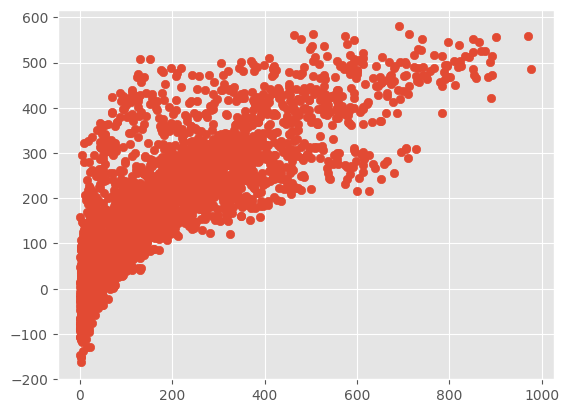

In [239]:
plt.scatter(y_test,tuned_svr_pred)

In [240]:
# Let us compare now Error rate of our model with hyper tuning of paramerters to our original model which is 
# without the tuning of parameters.

In [241]:
# With hyperparameter tuned 

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_svr_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_svr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_svr_pred)))

MAE: 70.89307623583471
MSE: 11011.170665386431
RMSE: 104.93412536151637


In [242]:
# Support Vector Regressor model (before hyperparameter tuning) is at 7th  position in models.values() 
list(models.values())[7]

SVR()

In [243]:
# without hyperparameter tuning 
svr_prediction=list(models.values())[7].predict(X_test)
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,svr_prediction))
print('MSE:', metrics.mean_squared_error(y_test, svr_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr_prediction)))

MAE: 84.27995028204026
MSE: 17744.260821483855
RMSE: 133.20758545024324


In [244]:
# Hyperparameter Tuning to Support Vector model has reduced its error slightly 
# and improved its accuracy from 43.53 percent to 65.2 percent

### Hyperparameter Tuning for Adaboost Regressor model

In [245]:
ABR_parameters={
    'learning_rate':[.1,.01,0.5,.001],
    # 'loss':['linear','square','exponential'],
    'n_estimators': [8,16,32,64,128,256]
}

In [246]:
abr_tuning_model=GridSearchCV(AdaBoostRegressor(),
                             param_grid=ABR_parameters,cv=3,n_jobs=-1)

In [247]:
abr_tuning_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.5, 0.001],
                         'n_estimators': [8, 16, 32, 64, 128, 256]})

In [248]:
# Checking Accuracy
print(f' Train Accuracy - : {abr_tuning_model.score(X_train,y_train):.3f}')
print(f' Test Accuracy - : {abr_tuning_model.score(X_test,y_test):.3f}')

 Train Accuracy - : 0.459
 Test Accuracy - : 0.442


In [249]:
# best hyperparameters for Adaboost Regressor model
abr_tuning_model.best_params_

{'learning_rate': 0.5, 'n_estimators': 32}

In [251]:
# training this model with best hyperparameters
tuned_abr_hyper_model= AdaBoostRegressor(learning_rate=0.5,n_estimators=32)

# fitting model
tuned_abr_hyper_model.fit(X_train,y_train)

AdaBoostRegressor(learning_rate=0.5, n_estimators=32)

In [252]:
# Check Accuracy
print (f'Train Accuracy - : {tuned_abr_hyper_model.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {tuned_abr_hyper_model.score(X_test,y_test):.3f}')

Train Accuracy - : 0.446
Test Accuracy - : 0.429


In [253]:
# prediction 

tuned_abr_pred=tuned_abr_hyper_model.predict(X_test)

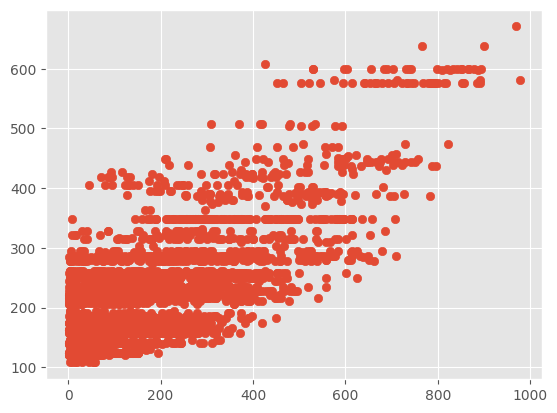

In [254]:
plt.scatter(y_test,tuned_abr_pred)

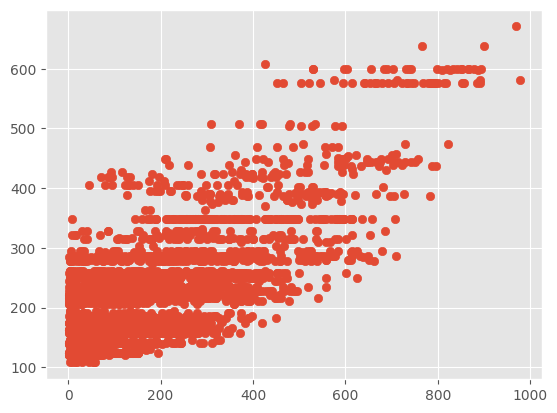

In [255]:
plt.scatter(y_test,tuned_abr_pred)

In [256]:
# Let us compare now Error rate of our model with hyper tuning of paramerters to our original model which is 
# without the tuning of parameters.

In [257]:
# With hyperparameter tuned 

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_abr_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_abr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_abr_pred)))

MAE: 112.95377794253021
MSE: 18072.331100975134
RMSE: 134.43337048878576


In [258]:
# Adaboost Regressor model (before hyperparameter tuning) is at 5th  position in models.values() 
list(models.values())[5]

AdaBoostRegressor()

In [259]:
# without hyperparameter tuning 
abr_prediction=list(models.values())[5].predict(X_test)
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,abr_prediction))
print('MSE:', metrics.mean_squared_error(y_test, abr_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, abr_prediction)))

MAE: 119.76503030895809
MSE: 19978.531190948885
RMSE: 141.34543215452308


In [260]:
# Hyperparameter Tuning to Adaboost Regressor model slightly reduced its error 
# and improved its accuracy slightly from 36.29 percent to 42.9 percent

### SO overall the best performing model that we got even after Hyperparameter tuning is CatBoost Regressor model with accuracy rate of 94.4 %